# Rule: **simplify_network**

**Outputs**

- resources/networks/`base_s.nc`
- resources/`regions_onshore_base_s.geojson`
- resources/`regions_offshore_base_s.geojson`
- resources/`busmap_base_s.csv`

In [1]:
######################################## Parameters

### Run
name = ''
prefix = ''

In [2]:
##### Import packages
import pypsa
import pandas as pd
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import yaml
import os 
import sys
import numpy as np


##### Import local functions
sys.path.append(os.path.abspath(os.path.join('..')))
import functions as xp


##### Read params.yaml
with open('../params.yaml', 'r') as configfile:
    params = yaml.safe_load(configfile)


##### Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


##### Region files
file_regions_onshore = f'regions_onshore_base_s.geojson'
file_regions_offshore = f'regions_offshore_base_s.geojson'
path_regions = f'{params['rootpath']}/resources/{prefix}/{name}/'
gdf_regions_onshore = gpd.read_file(path_regions+file_regions_onshore)
gdf_regions_offshore = gpd.read_file(path_regions+file_regions_offshore)


##### NUTS files (provided by the user, used here to display results at NUTS level. The files must contain at least the columns 'NUTS_ID' and 'geometry')
file_NUTS2 = 'NUTS2_ES.geojson'
file_NUTS3 = 'NUTS3_ES.geojson'
path_NUTS = f'{params['rootpath']}/data_ES/nuts/'
gdf_NUTS2 = gpd.read_file(path_NUTS+file_NUTS2)
gdf_NUTS3 = gpd.read_file(path_NUTS+file_NUTS3)


## `base_s.nc`

Load the network and show its components.

In [3]:
file = f'base_s.nc'
path = f'{params['rootpath']}/resources/{prefix}/{name}/networks/'

n = pypsa.Network(path+file)

n

INFO:pypsa.io:Imported network base_s.nc has buses, carriers, lines, links, shapes


PyPSA Network 'PyPSA-Eur (osm-prebuilt v0.6)'
---------------------------------------------
Components:
 - Bus: 557
 - Carrier: 2
 - Line: 835
 - Link: 1
 - Shape: 2
Snapshots: 8760

Plot the network.

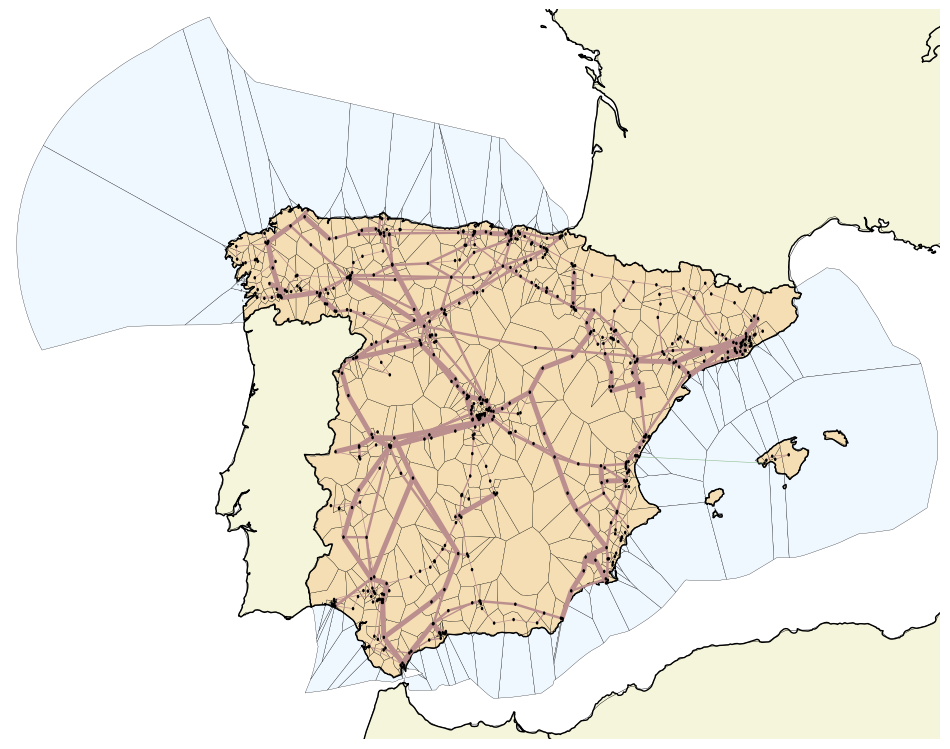

In [4]:
#################### Parameters
line_widths = 1*n.lines.s_nom / 1e3
link_widths = 1*n.links.p_nom / 1e3



#################### Figure
fig_size = [12,12]
crs = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=fig_size, subplot_kw={'projection': crs})


### Add network
n.plot(ax=ax, 
       line_widths=line_widths, 
       link_widths=link_widths, 
       bus_sizes=params['bus_sizes'], 
       bus_colors=params['bus_colors'], 
       boundaries=params['boundaries_offshore'])

### Add regions_onshore
xp.map_add_region(ax, gdf_regions_onshore, params['map_add_region'])

### Add regions_offshore
xp.map_add_region(ax, gdf_regions_offshore, params['map_add_region'], is_offshore=True)

### Add map features
xp.map_add_features(ax, params['map_add_features'])

### Variable: `n.buses`

Place `n.buses` in a dataFrame and show its content.

In [5]:
bb = n.buses

bb.head()

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,substation_off,country,substation_lv
Bus,,,,,,,,,,,,,,,
ES1-400,380.0,,-7.478964,43.702028,AC,,1.0,0.0,inf,PQ,,,True,ES,True
ES10-220,380.0,,-3.849633,43.344541,AC,,1.0,0.0,inf,PQ,,,True,ES,True
ES100-220,380.0,,1.344685,42.318896,AC,,1.0,0.0,inf,PQ,,,True,ES,True
ES101-220,380.0,,-8.138020,42.300963,AC,,1.0,0.0,inf,PQ,,,True,ES,True
ES102-220,380.0,,-8.080452,42.288093,AC,,1.0,0.0,inf,PQ,,,True,ES,True


### Variable: `n.lines`

Place `n.lines` in a dataFrame and show its content.

In [6]:
ln = n.lines

ln.head()

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom,i_nom,dc
Line,,,,,,,,,,,,,,,,,,,,,
merged_way/103881921-220+1,way/140781473-220,way/103511952-400,Al/St 240/40 4-bundle 380.0,29.176108,5.815835,0.0,0.000381,491.556019,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58,0.0
merged_way/111700589-220+2,way/1255236015-220,ES135-220,Al/St 240/40 4-bundle 380.0,14.103156,2.811260,0.0,0.000184,491.556019,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58,0.0
merged_way/120042944-220+1,ES127-220,way/48310486-220,Al/St 240/40 4-bundle 380.0,8.913329,1.776743,0.0,0.000116,491.556019,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58,0.0
merged_way/120042960-220+1,way/74384031-400,ES127-220,Al/St 240/40 4-bundle 380.0,15.033592,2.996729,0.0,0.000196,491.556019,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58,0.0
merged_way/121921889-220-a+2,ES165-220,way/586348408-220,Al/St 240/40 4-bundle 380.0,0.470586,0.093805,0.0,0.000025,983.112038,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380,2.58,0.0


How is the distribution of line lengths?

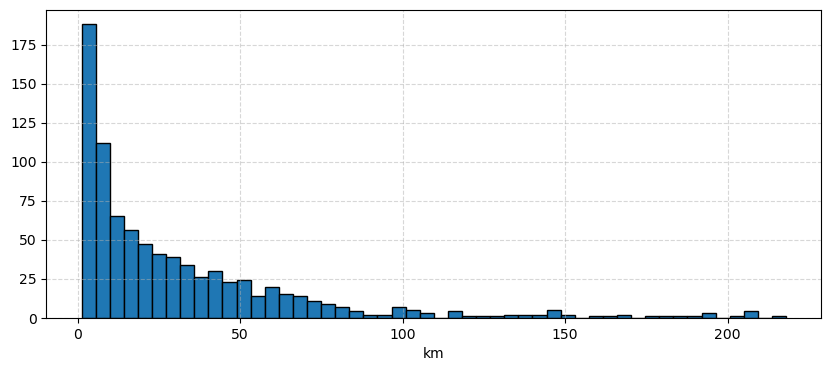

In [7]:
#################### Parameters
bins = 50



#################### Figure
fig_size = [10,4]
fig, ax = plt.subplots(figsize=fig_size)


ax.hist(ln['length'], bins=bins, edgecolor='black')

ax.set_xlabel('km')
ax.grid(True, linestyle='--', alpha=0.5)

### Variable: `n.links`

Place `n.links` in a dataFrame and show its content.

In [8]:
lk = n.links

lk.head()

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,tags,under_construction,underwater_fraction,voltage,geometry,dc,underground
Link,,,,,,,,,,,,,,,,,,,,,
relation/17631956-250-DC,way/77654729-400,way/347643820-220,,DC,1.0,True,0,inf,400.0,0.0,...,1.0,1.0,0.0,relation/17631956,False,0.98193,250,LINESTRING (-0.2354476169104305 39.64108480222...,1.0,True


## `regions_onshore_base_s.geojson`

Show its content.

In [9]:
gdf_regions_onshore.head()

,name,country,geometry
0,ES1-400,ES,"MULTIPOLYGON (((-7.58114 43.69042, -7.57709 43..."
1,ES10-220,ES,"POLYGON ((-3.96289 43.37001, -3.87596 43.38689..."
2,ES100-220,ES,"POLYGON ((1.35608 42.46502, 1.40626 42.51828, ..."
3,ES101-220,ES,"POLYGON ((-8.1282 42.29018, -8.20009 42.26922,..."
4,ES102-220,ES,"POLYGON ((-8.07139 42.37744, -8.01168 42.31404..."


How many regions are there in the file?

In [10]:
len(gdf_regions_onshore)

557

<Axes: >

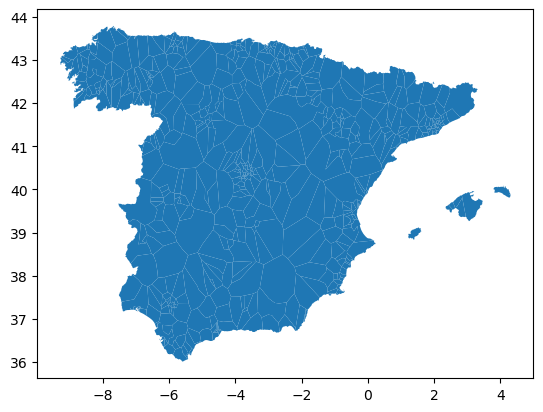

In [11]:
gdf_regions_onshore.plot()

## `regions_offshore_base_s.geojson`

Show its content.

In [12]:
gdf_regions_offshore = gpd.read_file(path_regions+file_regions_offshore)

gdf_regions_offshore.head()

,name,country,geometry
0,ES1-400,ES,"POLYGON ((-6.63743 44.42133, -6.74536 44.04293..."
1,ES105-220,ES,"POLYGON ((-9.16168 42.41222, -8.94365 42.37518..."
2,ES12-400,ES,"POLYGON ((-3.06316 43.34674, -3.06307 43.34703..."
3,ES133-400,ES,"POLYGON ((5.32094 41.47211, 5.40935 41.44441, ..."
4,ES14-400,ES,"POLYGON ((-4.76937 44.71695, -4.70749 45.13258..."


How many regions are there in the file?

In [13]:
len(gdf_regions_offshore)

107

<Axes: >

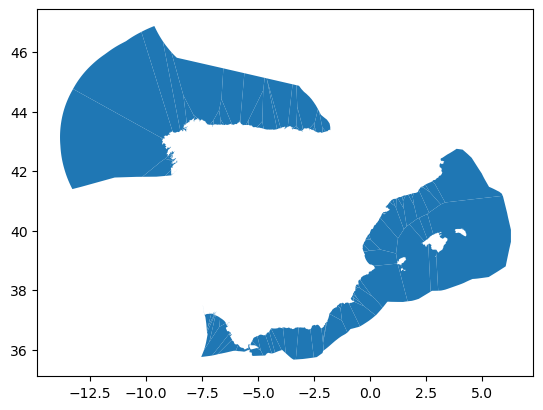

In [14]:
gdf_regions_offshore.plot()